In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import numpy as np

In [27]:
df1 = pd.read_csv("bodyPerformance.csv") 
df2 = pd.read_csv("UsedCars_Chennai.csv")

In [29]:
df1

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [30]:
df2

,Unnamed: 0,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,0,2019,Hyundai,Hyundai Verna 1.6 VTVT SX (O),Verna,1195000.0,10000.0,Petrol,Chennai
1,1,2021,Ford,Ford Endeavour Titanium Plus 2.0 4x4 AT,Endeavour,3850000.0,8000.0,Diesel,Chennai
2,2,2013,Hyundai,Hyundai i20 Magna 1.4 CRDI,i20,410000.0,83000.0,Diesel,Chennai
3,3,2013,Honda,Honda Amaze 1.5 S i-DTEC,Amaze,425000.0,100000.0,Diesel,Chennai
4,4,2016,Mercedes-Benz,Mercedes-Benz GLC 220 d Sport,GLC,3490000.0,38000.0,Diesel,Chennai
...,...,...,...,...,...,...,...,...,...
241,241,2020,Audi,Audi A4 35 TDI Premium Plus,A4,4400000.0,16000.0,Diesel,Chennai
242,242,2013,Audi,Audi A6 35 TDI Premium,A6,2100000.0,40000.0,Diesel,Chennai
243,243,2012,BMW,BMW 5 Series 520d Sedan,5,1800000.0,82000.0,Diesel,Chennai
244,244,2019,Mahindra,Mahindra Alturas G4 2WD AT [2018-2020],Alturas,2700000.0,30000.0,Diesel,Chennai


In [31]:
scaler = StandardScaler()

df1_encoded = pd.DataFrame(pd.get_dummies(df1.drop("class", axis=1)))
df2_encoded = pd.DataFrame(pd.get_dummies(df2))

first_df = pd.DataFrame(scaler.fit_transform(df1_encoded), columns = df1_encoded.columns)
first_df["class"] = df1["class"]
second_df = pd.DataFrame(scaler.fit_transform(df2_encoded), columns = df2_encoded.columns)

In [32]:
first_df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_F,gender_M,class
0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009,-0.762750,0.762750,C
1,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013,-0.762750,0.762750,A
2,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005,-0.762750,0.762750,C
3,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176,-0.762750,0.762750,B
4,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009,-0.762750,0.762750,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,-0.864220,0.420138,0.364265,-0.970178,-0.446565,0.731658,-0.109547,0.259063,0.506353,0.197418,-0.762750,0.762750,C
13389,-1.157795,1.322079,-0.296866,-1.535183,-0.446565,-0.151890,-0.373090,-1.668480,0.576400,-0.580177,-0.762750,0.762750,D
13390,0.163293,1.025388,1.092346,-0.432734,-0.074183,0.119971,2.497643,0.140809,0.366259,0.975013,-0.762750,0.762750,A
13391,1.998138,-2.665451,-0.815728,2.364730,-1.005140,-0.627647,-1.662566,-0.710621,-2.785848,-2.887878,1.311045,-1.311045,D


In [34]:
second_df

,Unnamed: 0,year,price,distance_travelled(kms),brand_Audi,brand_BMW,brand_Ford,brand_Honda,brand_Hyundai,brand_Jaguar,...,model_name_XC60,model_name_XC90,model_name_XF,model_name_XUV300,model_name_XUV500,model_name_i10,model_name_i20,fuel_type_Diesel,fuel_type_Petrol,city_Chennai
0,-1.725024,1.046915,-0.255124,-1.086241,-0.245652,-0.272462,-0.336336,-0.328798,2.203893,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,-1.328174,1.328174,0.0
1,-1.710942,1.677371,1.727894,-1.136362,-0.245652,-0.272462,2.973214,-0.328798,-0.453743,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,0.752914,-0.752914,0.0
2,-1.696861,-0.844452,-0.841440,0.743175,-0.245652,-0.272462,-0.336336,-0.328798,2.203893,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,11.045361,0.752914,-0.752914,0.0
3,-1.682779,-0.844452,-0.830236,1.169204,-0.245652,-0.272462,-0.336336,3.041381,-0.453743,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,0.752914,-0.752914,0.0
4,-1.668697,0.101232,1.459010,-0.384547,-0.245652,-0.272462,-0.336336,-0.328798,-0.453743,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,0.752914,-0.752914,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1.668697,1.362143,2.138689,-0.935878,4.070802,-0.272462,-0.336336,-0.328798,-0.453743,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,0.752914,-0.752914,0.0
242,1.682779,-0.844452,0.420820,-0.334426,4.070802,-0.272462,-0.336336,-0.328798,-0.453743,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,0.752914,-0.752914,0.0
243,1.696861,-1.159680,0.196750,0.718115,-0.245652,3.670230,-0.336336,-0.328798,-0.453743,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,0.752914,-0.752914,0.0
244,1.710942,1.046915,0.868960,-0.585031,-0.245652,-0.272462,-0.336336,-0.328798,-0.453743,-0.144038,...,-0.090536,-0.090536,-0.111111,-0.128565,-0.18334,-0.128565,-0.090536,0.752914,-0.752914,0.0


In [36]:
X1 = first_df.drop("class", axis=1)
y1 = first_df["class"]

In [38]:
X2 = second_df.drop("price", axis=1)
y2 = second_df["price"]

In [39]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X2, y2, test_size=0.2, random_state=42)

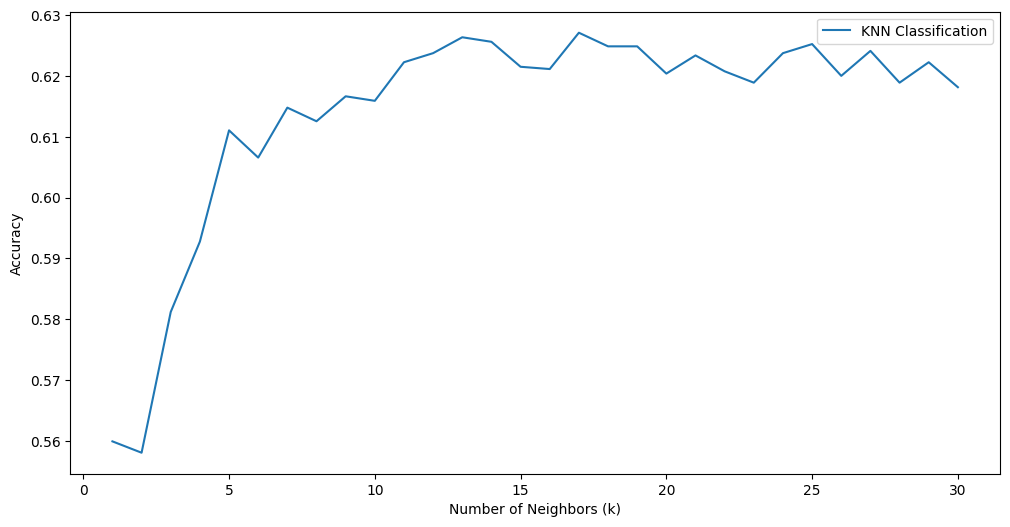

In [41]:
k_values = range(1, 31)
knn_class_accuracies = []
knn_reg_mses = []

for k in k_values:
    # Classification
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(X_train_class, y_train_class)
    knn_class_accuracies.append(accuracy_score(y_test_class, knn_class.predict(X_test_class)))

    # Regression
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg, y_train_reg)
    knn_reg_mses.append(mean_squared_error(y_test_reg, knn_reg.predict(X_test_reg)))

plt.figure(figsize=(12, 6))
plt.plot(k_values, knn_class_accuracies, label='KNN Classification')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Optimal number of cluster 11

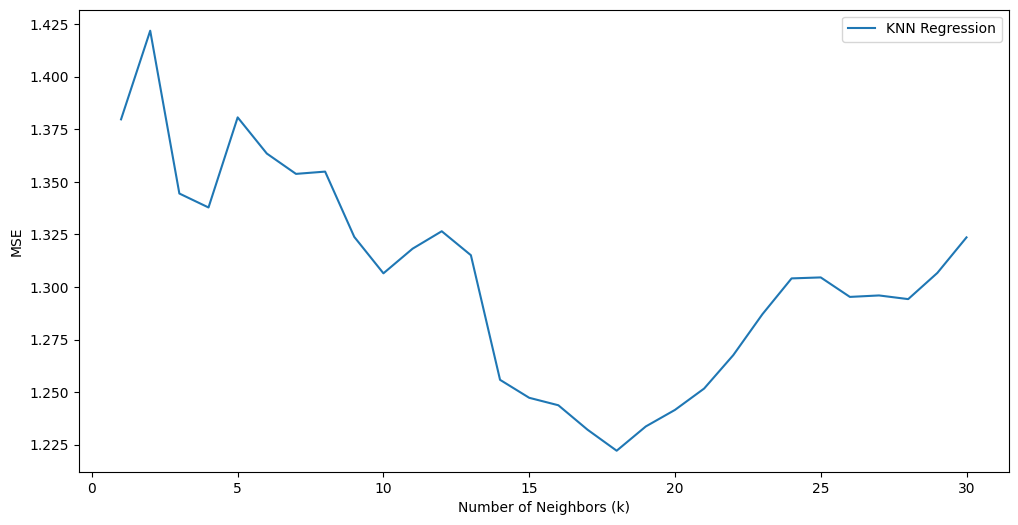

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, knn_reg_mses, label='KNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MSE')
plt.legend()
plt.show()

Optimal number of clusters 10

In [44]:
max_depth_values = range(1, 31)
max_features_values = range(1, X_train_class.shape[1]+1) # For classification, the number of features in iris dataset
dt_class_accuracies_gini = np.zeros((len(max_depth_values), len(max_features_values)))
dt_class_accuracies_entropy = np.zeros((len(max_depth_values), len(max_features_values)))
dt_reg_mses_friedman = np.zeros((len(max_depth_values), len(max_features_values)))
dt_reg_mses_poisson = np.zeros((len(max_depth_values), len(max_features_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_features in enumerate(max_features_values):
        # Classification
        dt_class_gini = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion='gini')
        dt_class_gini.fit(X_train_class, y_train_class)
        dt_class_accuracies_gini[i, j] = accuracy_score(y_test_class, dt_class_gini.predict(X_test_class))

        dt_class_entropy = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion='entropy')
        dt_class_entropy.fit(X_train_class, y_train_class)
        dt_class_accuracies_entropy[i, j] = accuracy_score(y_test_class, dt_class_entropy.predict(X_test_class))

        # Regression
        dt_reg_friedman = DecisionTreeRegressor(max_depth=max_depth, max_features=max_features, criterion='friedman_mse')
        dt_reg_friedman.fit(X_train_reg, np.abs(y_train_reg))
        dt_reg_mses_friedman[i, j] = mean_squared_error(np.abs(y_test_reg), dt_reg_friedman.predict(X_test_reg))

        dt_reg_poisson = DecisionTreeRegressor(max_depth=max_depth, max_features=max_features, criterion='poisson')
        dt_reg_poisson.fit(X_train_reg, np.abs(y_train_reg))
        dt_reg_mses_poisson[i, j] = mean_squared_error(np.abs(y_test_reg), dt_reg_poisson.predict(X_test_reg))

accracy of Decistion tree clasifier

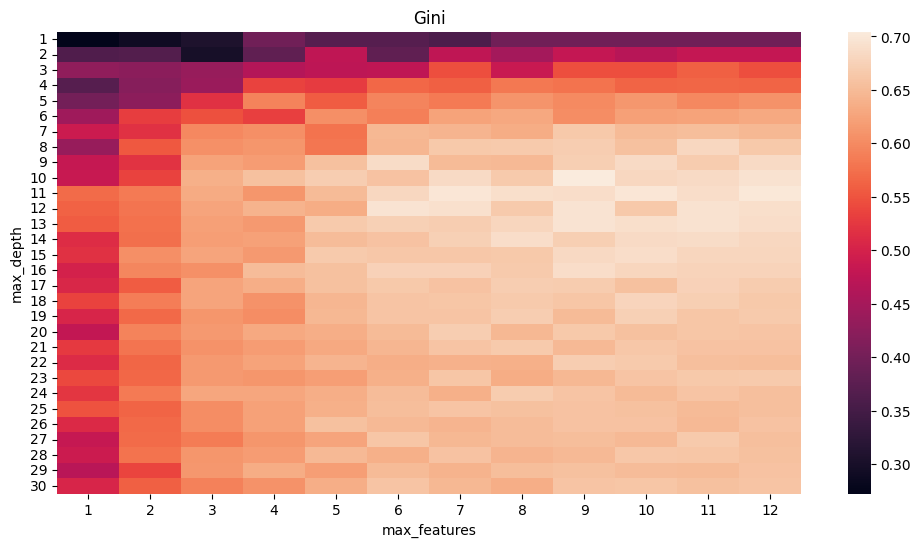

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(dt_class_accuracies_gini, xticklabels=max_features_values, yticklabels=max_depth_values)
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Gini')
plt.show()

we can see that bigger the deph and the number of feutures if biger is the acuracy


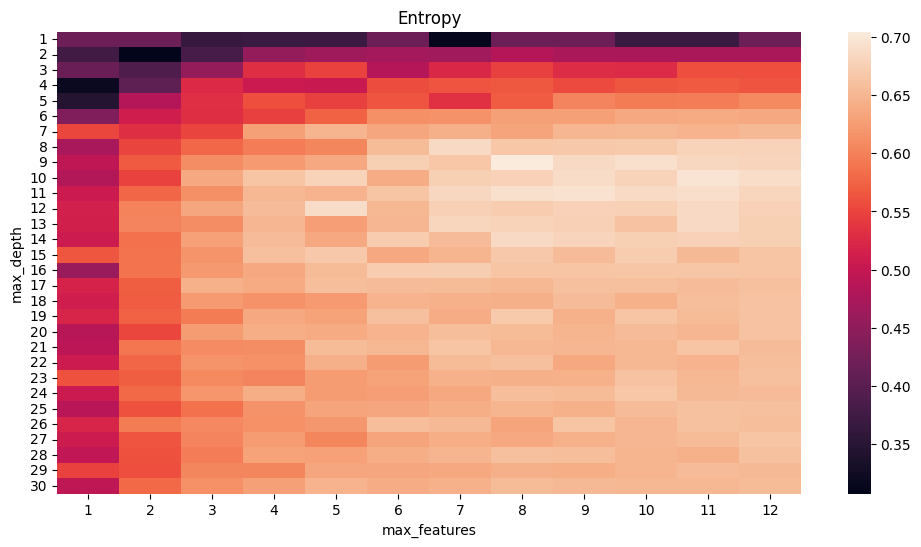

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(dt_class_accuracies_entropy, xticklabels=max_features_values, yticklabels=max_depth_values)
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Entropy')
plt.show()

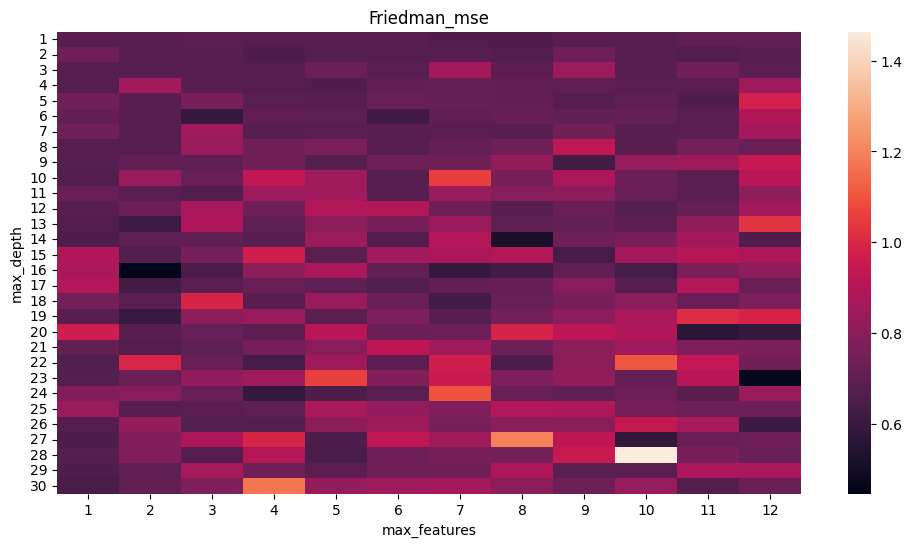

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(dt_reg_mses_friedman, xticklabels=max_features_values, yticklabels=max_depth_values)
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Friedman_mse')
plt.show()

for the MSE the value decress with giffer deph and feturews

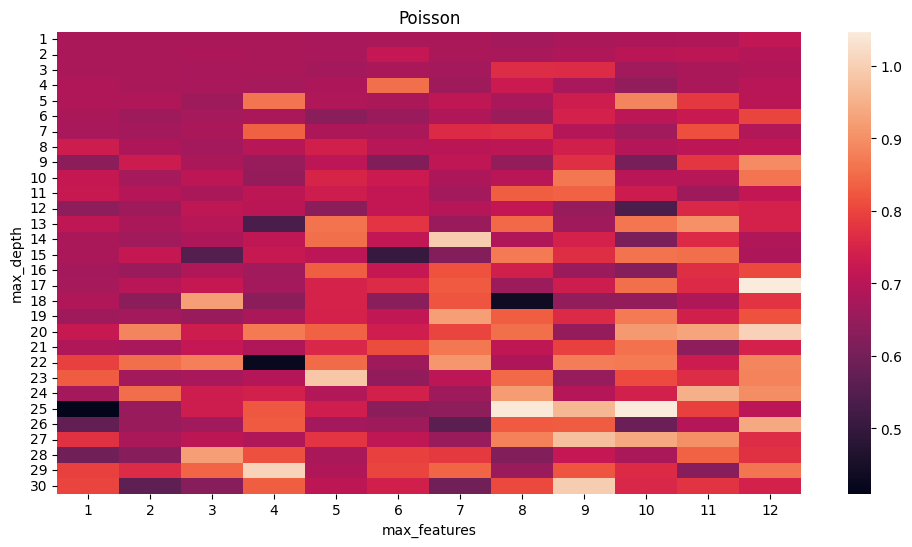

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(dt_reg_mses_poisson, xticklabels=max_features_values, yticklabels=max_depth_values)
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Poisson')
plt.show()


Poisson Distribution:

The Poisson distribution is a probability distribution that expresses the number of events that will occur in a fixed interval of time or space. It is often used to model the number of events that occur within a fixed period or region, given the average rate of occurrence.
Poisson Regression:

Poisson regression is a type of regression analysis used when the dependent variable is a count, and the assumption is that the counts follow a Poisson distribution. It's commonly employed in situations where you are modeling the number of times an event occurs in a fixed interval of time or space.

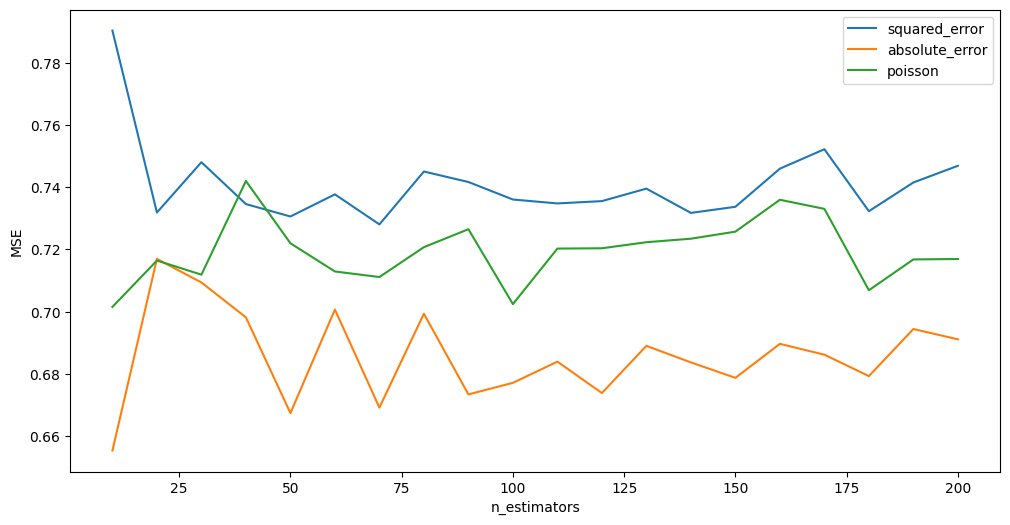

In [51]:
n_estimators_values = range(10, 201, 10)
criterion_values = ['squared_error', 'absolute_error', 'poisson']
mse_values = {criterion: [] for criterion in criterion_values}

# Iterate through different n_estimators and criterion values
for criterion in criterion_values:
    for n_estimators in n_estimators_values:
        rf_reg = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion)
        rf_reg.fit(X_train_reg, np.abs(y_train_reg))
        mse = mean_squared_error(np.abs(y_test_reg), rf_reg.predict(X_test_reg))
        mse_values[criterion].append(mse)

# Plot MSE values
plt.figure(figsize=(12, 6))
for criterion, mse in mse_values.items():
    plt.plot(n_estimators_values, mse, label=criterion)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()
plt.show()

We can see that the accuracy of squared_error increases and then remains relatively, absolute error and poisson decrease and then have the same behaviour as squared_error.

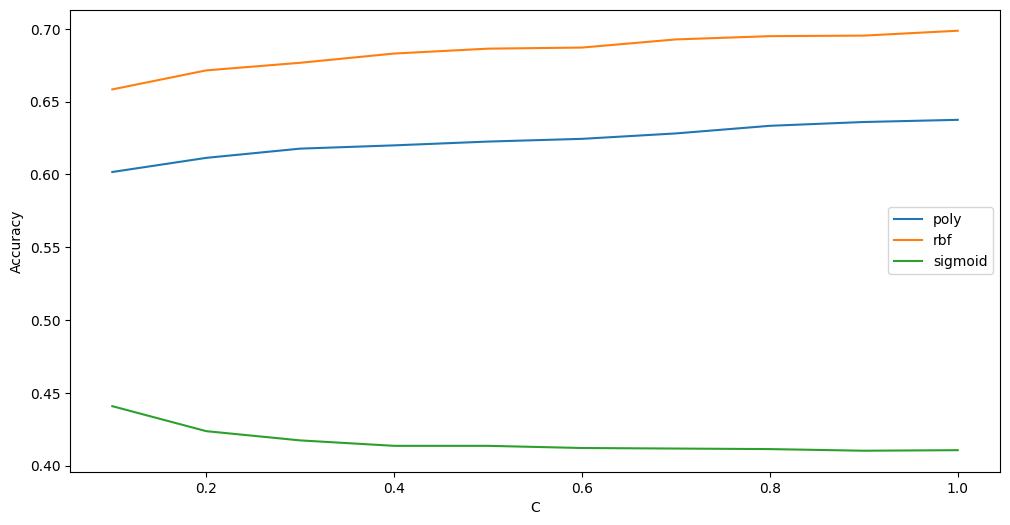

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_values = np.linspace(0.1, 1.0, 10)
kernel_values = ['poly', 'rbf', 'sigmoid']
accuracy_values = {kernel: [] for kernel in kernel_values}

for kernel in kernel_values:
    for C in C_values:
        svc = SVC(C=C, kernel=kernel)
        svc.fit(X_train_class, y_train_class)
        accuracy = accuracy_score(y_test_class, svc.predict(X_test_class))
        accuracy_values[kernel].append(accuracy)

plt.figure(figsize=(12, 6))
for kernel, accuracy in accuracy_values.items():
    plt.plot(C_values, accuracy, label=kernel)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Poly and rbf both increase over time in accuracy, rbf having the biggestone, while sigmoid decreases.

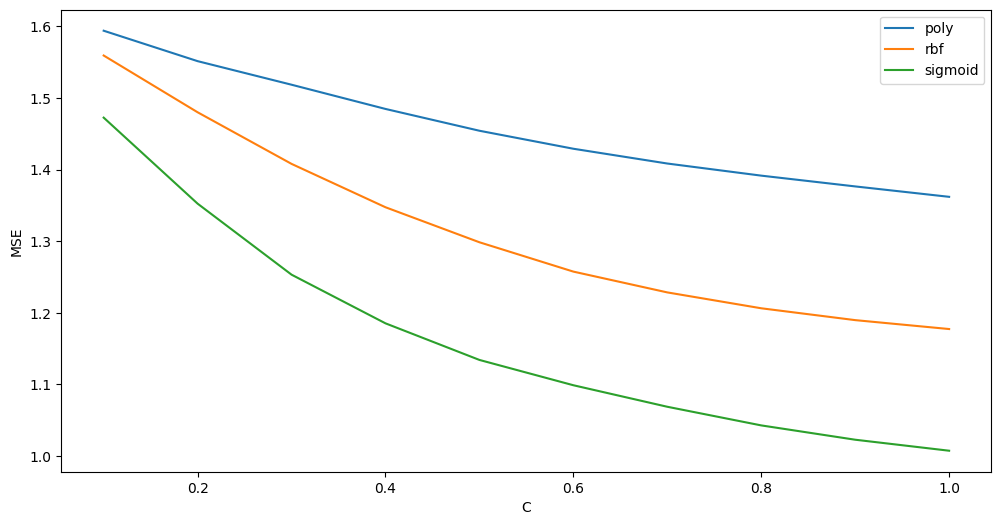

In [53]:
from sklearn.svm import SVR

C_values = np.linspace(0.1, 1.0, 10)
kernel_values = ['poly', 'rbf', 'sigmoid']
mse_values = {kernel: [] for kernel in kernel_values}

for kernel in kernel_values:
    for C in C_values:
        svr = SVR(C=C, kernel=kernel)
        svr.fit(X_train_reg, y_train_reg)
        mse = mean_squared_error(y_test_reg, svr.predict(X_test_reg))
        mse_values[kernel].append(mse)

plt.figure(figsize=(12, 6))
for kernel, mse in mse_values.items():
    plt.plot(C_values, mse, label=kernel)
plt.xlabel('C')
plt.ylabel('MSE')
plt.legend()
plt.show()

Random SErch
